In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [157]:
from typing import Tuple, Union
import time
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 15

<IPython.core.display.Javascript object>

In [95]:
data

array([ 4.76667939,  5.25895226,  5.41950965,  5.20470794,  5.45691303,
       -5.        ])

<IPython.core.display.Javascript object>

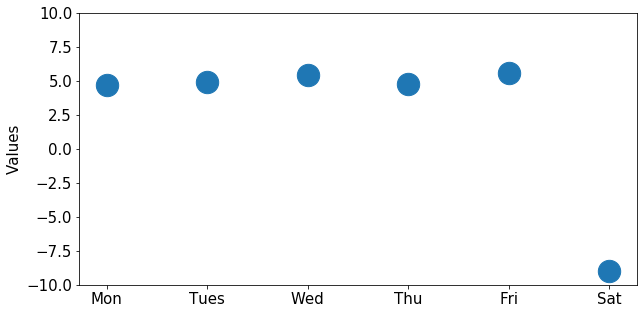

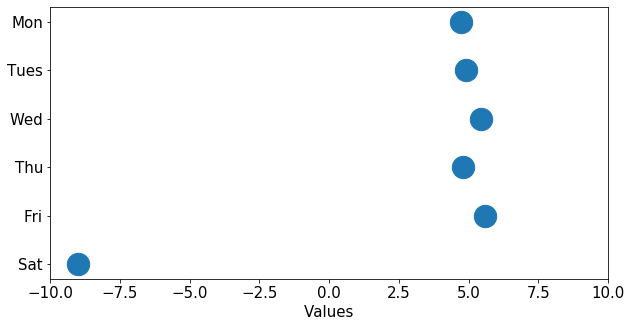

<IPython.core.display.Javascript object>

In [109]:
n_data = 5
mu_true = 5
var_true = 0.1
data = stats.norm.rvs(size=5, loc=mu_true, scale=np.sqrt(var_true))
data = np.append(data, -9)
df_data = pd.DataFrame(
    {"day": ["Mon", "Tues", "Wed", "Thu", "Fri", "Sat"], "data": data}
)


plt.scatter(x=df_data["day"], y=df_data["data"], s=500)
plt.ylabel("Values")

plt.ylim([-10, 10])
plt.show()


plt.scatter(y=df_data["day"][::-1], x=df_data["data"][::-1], s=500)
plt.xlabel("Values")
plt.xlim([-10, 10])
plt.show()


## Online Updates of Conjugate Priors Parameters


\begin{align*}
\kappa_t = {} & \kappa_{t-1} + 1 \\
\mu_t = {} & \frac{1}{\kappa_t}  \left(  x_t + \kappa_{t-1} \mu_{t-1}  \right) \\
\alpha_t = {} & \alpha_{t-1} + 1/2  \\
\beta_t = {} & \beta_{t-1} + \frac{\kappa_t (x_t - \mu_t)^2 }{2 (\kappa_t + 1)} \\
   x | \mu_t, \tau_t  \sim {} & \textsf{Student-T}_{2\alpha_t} \left(\mu=\mu_t, \tau= \frac{\alpha_t \kappa_t}{\beta_t(\kappa_t + 1)}   \right)
\end{align*}

In [102]:
class StudentT:
    def __init__(self, mu, kappa, alpha, beta):
        self.mu = mu
        self.kappa = kappa
        self.alpha = alpha
        self.beta = beta

        self.df = 2 * self.alpha
        self.std_dev = np.sqrt(self.beta * (self.kappa + 1) / (self.alpha * self.kappa))

    def likelihood(self, x: Union[float, np.array]) -> Union[float, np.array]:
        return stats.t.pdf(x=x, df=self.df, loc=self.mu, scale=self.std_dev)

<IPython.core.display.Javascript object>

In [27]:
mu_x_axis = np.arange(-10, 10, step=0.1)

<IPython.core.display.Javascript object>

In [172]:
def update(data: np.array, end: int):

    fig, ax = plt.subplots()

    ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

    n = len(data)

    mu = np.zeros(n + 1)
    kappa = np.zeros(n + 1)
    alpha = np.zeros(n + 1)
    beta = np.zeros(n + 1)
    likelihoods = np.zeros(n + 1)

    mu[0] = 0
    kappa[0] = 0.1
    alpha[0] = 1
    beta[0] = 20

    for t in range(1, end):
        x_t = data[t - 1]

        student_t = StudentT(
            mu=mu[t - 1], kappa=kappa[t - 1], alpha=kappa[t - 1], beta=beta[t - 1]
        )
        likelihoods[t] = student_t.likelihood(x=x_t)
        # Data distribution
        full_pdf = student_t.likelihood(x=mu_x_axis)
        plt.plot(mu_x_axis, full_pdf, label=t)
        plt.axvline(
            x=x_t, linestyle="--", color="k", linewidth=0.5,
        )

        # Update Params
        kappa[t] = 1 + kappa[t - 1]

        mu[t] = (1 / kappa[t]) * (x_t + kappa[t - 1] * mu[t - 1])

        alpha[t] = 0.5 + alpha[t - 1]

        beta[t] = (
            beta[t - 1]
            + 0.5 * kappa[t - 1] / (kappa[t - 1] + 1) * (x_t - mu[t - 1]) ** 2
        )

    plt.legend()
    plt.xlim([-10, 10])

    plt.show()


def plot_days(end: int):
    plt.scatter(y=df_data["day"][: end - 1], x=df_data["data"][: end - 1], s=500)
    plt.xlabel("Values")
    plt.xlim([-10, 10])
    plt.show()

<IPython.core.display.Javascript object>

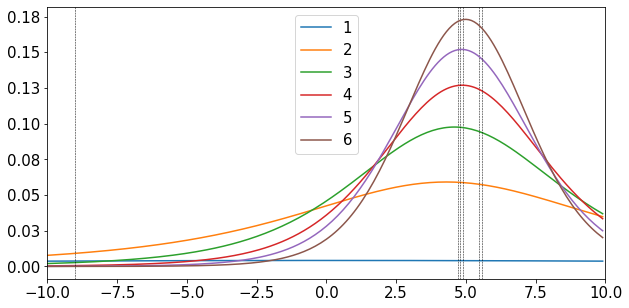

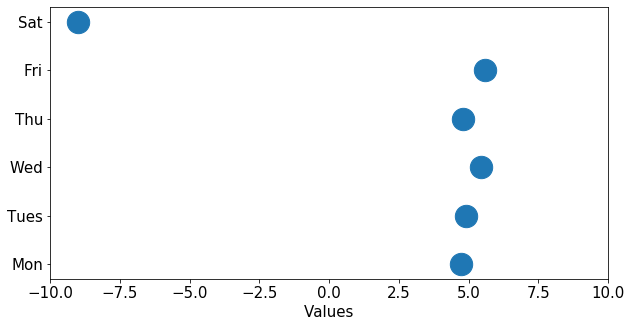

<IPython.core.display.Javascript object>

In [179]:
# till n+1
end = 7
update(data, end=end)
plot_days(end=end)

In [180]:
# Notion of Run Length






<IPython.core.display.Javascript object>